In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy
from scipy.io import readsav
from scipy.signal import find_peaks_cwt
from scipy.stats import spearmanr

from os import listdir
    #method listdir() returns a list containing the names of the entries in the directory given by path.
from os.path import isfile, join
    #returns true if file in path is an existing regular file

In [2]:
## !! set correct working directory
import os
path="/Users/jeroenhabets/Dropbox/PhD werkmap/DBS prediction project"
os.chdir(path)
os.getcwd() #check

'/Users/jeroenhabets/Dropbox/PhD werkmap/DBS prediction project'

In [38]:
### reading in excel database
data = pd.read_excel('DBS_FU_okt2018.xlsx')
columns = data.keys()

In [39]:
## extracting existing relevant columns from original database
generalCols = columns[:9].tolist() # general patient info; converted to list
#print(generalCols)
preCols = columns[15:35].tolist() # preop UPDRS scorings + LED; converted to list
#print(preCols)
oneYearCols = columns[72:109].tolist() # 12 months postop UPDRS + LED; converted to list
#print(oneYearCols)



In [40]:
# add new created cols to relevantCols
relevantCols = generalCols + preCols + oneYearCols # make list of 3 lists
relevantData = data[relevantCols] #  data of relevant columns from original database

In [41]:
### adding relevant new parameters direct to relevantData
relevantData['UPDRS.I_pre_LEDdif'] = (relevantData['UPDRS.I_pre_on'] - relevantData['UPDRS.I_pre_off'])
relevantData['UPDRS.II_pre_LEDdif'] = (relevantData['UPDRS.II_pre_on'] - relevantData['UPDRS.II_pre_off'])
relevantData['UPDRS.III_pre_LEDdif'] = (relevantData['UPDRS.III_pre_on'] - relevantData['UPDRS.III_pre_off'])
relevantData['UPDRS.IV_pre_LEDdif'] = (relevantData['UPDRS.IV_pre_on'] - relevantData['UPDRS.IV_pre_off'])

relevantData['UPDRS.I_pre_%LEDdif'] = (relevantData['UPDRS.I_pre_on'] - relevantData['UPDRS.I_pre_off'])/ relevantData['UPDRS.I_pre_off']
relevantData['UPDRS.II_pre_%LEDdif'] = (relevantData['UPDRS.II_pre_on'] - relevantData['UPDRS.II_pre_off'])/ relevantData['UPDRS.II_pre_off']
relevantData['UPDRS.III_pre_%LEDdif'] = (relevantData['UPDRS.III_pre_on'] - relevantData['UPDRS.III_pre_off'])/ relevantData['UPDRS.III_pre_off']
relevantData['UPDRS.IV_pre_%LEDdif'] = (relevantData['UPDRS.IV_pre_on'] - relevantData['UPDRS.IV_pre_off'])/ relevantData['UPDRS.IV_pre_off']

## add new parameters to different Cols lists
preCols.append('UPDRS.I_pre_LEDdif')
preCols.append('UPDRS.II_pre_LEDdif')
preCols.append('UPDRS.III_pre_LEDdif')
preCols.append('UPDRS.IV_pre_LEDdif')

preCols.append('UPDRS.I_pre_%LEDdif')
preCols.append('UPDRS.II_pre_%LEDdif')
preCols.append('UPDRS.III_pre_%LEDdif')
preCols.append('UPDRS.IV_pre_%LEDdif')

# post_StimEff = improvement stimON-medON vs stimOFF-medON
relevantData['UPDRS.III_post_StimEff'] = relevantData['UPDRS.III_post_1y_on.on'] - relevantData['UPDRS.III_post_1y_off.on']
# post_TotEff = improvement stimON-medON vs stimOFF-medOFF
relevantData['UPDRS.III_post_TotEff'] = relevantData['UPDRS.III_post_1y_on.on'] - relevantData['UPDRS.III_post_1y_off.off']

# PrePost_MedON = improvement preMedON vs post StimON-MedON
relevantData['UPDRS.I_PrePost_MedON'] = relevantData['UPDRS.I_post_1y_on.on'] - relevantData['UPDRS.I_pre_on']
# PrePost_MedOFF = improvement preMedON vs post StimON-MedON
relevantData['UPDRS.I_PrePost_MedOFF'] = relevantData['UPDRS.I_post_1y_on.on'] - relevantData['UPDRS.I_pre_off']

# PrePost_MedON = improvement preMedON vs post StimON-MedON
relevantData['UPDRS.II_PrePost_MedON'] = relevantData['UPDRS.II_post_1y_on.on'] - relevantData['UPDRS.II_pre_on']
# PrePost_MedOFF = improvement preMedON vs post StimON-MedON
relevantData['UPDRS.II_PrePost_MedOFF'] = relevantData['UPDRS.II_post_1y_on.on'] - relevantData['UPDRS.II_pre_off']

# PrePost_MedON = improvement preMedON vs post StimON-MedON
relevantData['UPDRS.III_PrePost_MedON'] = relevantData['UPDRS.III_post_1y_on.on'] - relevantData['UPDRS.III_pre_on']
# PrePost_MedOFF = improvement preMedON vs post StimON-MedON
relevantData['UPDRS.III_PrePost_MedOFF'] = relevantData['UPDRS.III_post_1y_on.on'] - relevantData['UPDRS.III_pre_off']

# PrePost_MedON = improvement preMedON vs post StimON-MedON
relevantData['UPDRS.IV_PrePost_MedON'] = relevantData['UPDRS.IV_post_1y_on.on'] - relevantData['UPDRS.IV_pre_on']
# PrePost_MedOFF = improvement preMedON vs post StimON-MedON
relevantData['UPDRS.IV_PrePost_MedOFF'] = relevantData['UPDRS.IV_post_1y_on.on'] - relevantData['UPDRS.IV_pre_off']

# relative improvement preMedON vs post StimON-MedON
relevantData['UPDRS.I_%PrePost_MedON'] = (relevantData['UPDRS.I_post_1y_on.on'] - relevantData['UPDRS.I_pre_on'])/relevantData['UPDRS.I_pre_on']
# relative improvement preMedOFF vs post StimON-MedON
relevantData['UPDRS.I_%PrePost_MedOFF'] = (relevantData['UPDRS.I_post_1y_on.on'] - relevantData['UPDRS.I_pre_off'])/relevantData['UPDRS.I_pre_off']

# relative improvement preMedON vs post StimON-MedON
relevantData['UPDRS.II_%PrePost_MedON'] = (relevantData['UPDRS.II_post_1y_on.on'] - relevantData['UPDRS.II_pre_on'])/relevantData['UPDRS.II_pre_on']
# relative improvement preMedOFF vs post StimON-MedON
relevantData['UPDRS.II_%PrePost_MedOFF'] = (relevantData['UPDRS.II_post_1y_on.on'] - relevantData['UPDRS.II_pre_off'])/relevantData['UPDRS.II_pre_off']

# relative improvement preMedON vs post StimON-MedON
relevantData['UPDRS.III_%PrePost_MedON'] = (relevantData['UPDRS.III_post_1y_on.on'] - relevantData['UPDRS.III_pre_on'])/relevantData['UPDRS.III_pre_on']
# relative improvement preMedOFF vs post StimON-MedON
relevantData['UPDRS.III_%PrePost_MedOFF'] = (relevantData['UPDRS.III_post_1y_on.on'] - relevantData['UPDRS.III_pre_off'])/relevantData['UPDRS.III_pre_off']


# relative improvement preMedON vs post StimON-MedON
relevantData['UPDRS.IV_%PrePost_MedON'] = (relevantData['UPDRS.IV_post_1y_on.on'] - relevantData['UPDRS.IV_pre_on'])/relevantData['UPDRS.IV_pre_on']
# relative improvement preMedOFF vs post StimON-MedON
relevantData['UPDRS.IV_%PrePost_MedOFF'] = (relevantData['UPDRS.IV_post_1y_on.on'] - relevantData['UPDRS.IV_pre_off'])/relevantData['UPDRS.IV_pre_off']

# relative improvement stimON-medON vs stimOFF-medON
relevantData['UPDRS.III_%post_StimEff'] = (relevantData['UPDRS.III_post_1y_on.on'] - relevantData['UPDRS.III_post_1y_off.on'])/relevantData['UPDRS.IV_post_1y_off.on']

# LEDD difference pre and post
relevantData['LED_PrePostDiff'] = relevantData['LED_post_1y']-relevantData['LED_pre']
# relative LEDD difference pre and post
relevantData['LED_%PrePostDiff'] = (relevantData['LED_post_1y']-relevantData['LED_pre'])/relevantData['LED_pre']

oneYearCols.append('UPDRS.III_post_StimEff')
oneYearCols.append('UPDRS.III_post_TotEff')

oneYearCols.append('UPDRS.I_PrePost_MedON')
oneYearCols.append('UPDRS.I_PrePost_MedOFF')
oneYearCols.append('UPDRS.II_PrePost_MedON')
oneYearCols.append('UPDRS.II_PrePost_MedOFF')
oneYearCols.append('UPDRS.III_PrePost_MedON')
oneYearCols.append('UPDRS.III_PrePost_MedOFF')
oneYearCols.append('UPDRS.IV_PrePost_MedON')
oneYearCols.append('UPDRS.IV_PrePost_MedOFF')

oneYearCols.append('UPDRS.I_%PrePost_MedON')
oneYearCols.append('UPDRS.I_%PrePost_MedOFF')
oneYearCols.append('UPDRS.II_%PrePost_MedON')
oneYearCols.append('UPDRS.II_%PrePost_MedOFF')
oneYearCols.append('UPDRS.III_%PrePost_MedON')
oneYearCols.append('UPDRS.III_%PrePost_MedOFF')
oneYearCols.append('UPDRS.IV_%PrePost_MedON')
oneYearCols.append('UPDRS.IV_%PrePost_MedOFF')

oneYearCols.append('UPDRS.III_%post_StimEff')

oneYearCols.append('LED_PrePostDiff')
oneYearCols.append('LED_%PrePostDiff')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [42]:
relevantData.keys()

Index(['PtNr', 'Check', 'Gender', 'Date_DBS', 'Age_DBS', 'Diagnosis', 'Target',
       'Disease_duration', 'Age_disease_onset', 'UPDRS.I_pre_on',
       'UPDRS.I_pre_off', 'UPDRS.II_pre_on', 'UPDRS.II_pre_off',
       'UPDRS.III_pre_on', 'UPDRS.III_pre_off', 'UPDRS.IV_pre_on',
       'UPDRS.IV_pre_off', 'Disease_subtype', 'LED_pre', 'Tremor_pre_on',
       'Tremor_pre_off', 'Axial_pre_on', 'Axial_pre_off',
       'Bradykinesia_pre_on', 'Bradykinesia_pre_off', 'Rigidity_pre_on',
       'Rigidity_pre_off', 'HY_pre_on', 'HY_pre_off', 'LED_post_1y',
       'UPDRS.I_post_1y_on.on', 'UPDRS.II_post_1y_on.on',
       'UPDRS.III_post_1y_on.on', 'UPDRS.IV_post_1y_on.on', 'HY_post_1y_on.on',
       'Tremor_post_1y_on.on', 'Axial_post_1y_on.on',
       'Bradykinesia_post_1y_on.on', 'Rigidity_post_1y_on.on',
       'UPDRS.I_post_1y_on.off', 'UPDRS.II_post_1y_on.off',
       'UPDRS.III_post_1y_on.off', 'UPDRS.IV_post_1y_on.off',
       'HY_post_1y_on.off', 'Tremor_post_1y_on.off', 'Axial_post_1y_on.

In [6]:
## check for combining missing values

def missingDataCombis(feat1,feat2):
    missings = 0
    for pt in range(len(relevantData[feat1])):
        if np.isnan(relevantData[feat1][pt]) == True:
            missings = missings + 1
        else:
            if np.isnan(relevantData[feat2][pt]) == True:
                missings = missings + 1
    return print(str(feat1),' OR ',str(feat2),' is missing in ',missings,' subjects. N = ',len(relevantData[feat1])-missings)

In [7]:
missingDataCombis('UPDRS.III_pre_on','UPDRS.III_pre_off')
missingDataCombis('UPDRS.III_pre_on','UPDRS.III_post_1y_on.on')
missingDataCombis('UPDRS.III_pre_off','UPDRS.III_post_1y_on.on')
missingDataCombis('UPDRS.III_pre_off','UPDRS.III_post_1y_on.off')
missingDataCombis('UPDRS.III_post_1y_off.off','UPDRS.III_post_1y_on.on')
missingDataCombis('UPDRS.III_post_1y_off.on','UPDRS.III_post_1y_on.on')



missingDataCombis('LED_pre','LED_post_1y')

UPDRS.III_pre_on  OR  UPDRS.III_pre_off  is missing in  24  subjects. N =  103
UPDRS.III_pre_on  OR  UPDRS.III_post_1y_on.on  is missing in  29  subjects. N =  98
UPDRS.III_pre_off  OR  UPDRS.III_post_1y_on.on  is missing in  36  subjects. N =  91
UPDRS.III_pre_off  OR  UPDRS.III_post_1y_on.off  is missing in  95  subjects. N =  32
UPDRS.III_post_1y_off.off  OR  UPDRS.III_post_1y_on.on  is missing in  89  subjects. N =  38
UPDRS.III_post_1y_off.on  OR  UPDRS.III_post_1y_on.on  is missing in  95  subjects. N =  32
LED_pre  OR  LED_post_1y  is missing in  32  subjects. N =  95


Possibilities to use for outcome value:
* improvement post vs pre:
    - post_on.on vs pre_on (n = 98)
    - post_on.on vs pre_off (n = 91)
    - post_on.off vs pre_off (n = 32)
* improvement post on vs post off
    - post_on.on vs post_off.off (n = 38)
    - post_on.on vs post_off.on (n=32)

Most logical choice would be:
- post_on.on vs pre_on (n = 98)
- post_on.on vs pre_off (n = 91)

In [43]:
## create new database with population without missing outcome

# population without missing post_on.on vs pre_on (n = 98)
dataOnOnvsOn = relevantData.dropna(subset=['UPDRS.III_PrePost_MedON'])
# population without missing post_on.on vs pre_off (n = 91)
dataOnOnvsOff = relevantData.dropna(subset=['UPDRS.III_PrePost_MedOFF'])

# check total missings within data
#print(dataOnOnvsOn.isna().sum())


In [44]:
dataOnOnvsOn.keys()

Index(['PtNr', 'Check', 'Gender', 'Date_DBS', 'Age_DBS', 'Diagnosis', 'Target',
       'Disease_duration', 'Age_disease_onset', 'UPDRS.I_pre_on',
       'UPDRS.I_pre_off', 'UPDRS.II_pre_on', 'UPDRS.II_pre_off',
       'UPDRS.III_pre_on', 'UPDRS.III_pre_off', 'UPDRS.IV_pre_on',
       'UPDRS.IV_pre_off', 'Disease_subtype', 'LED_pre', 'Tremor_pre_on',
       'Tremor_pre_off', 'Axial_pre_on', 'Axial_pre_off',
       'Bradykinesia_pre_on', 'Bradykinesia_pre_off', 'Rigidity_pre_on',
       'Rigidity_pre_off', 'HY_pre_on', 'HY_pre_off', 'LED_post_1y',
       'UPDRS.I_post_1y_on.on', 'UPDRS.II_post_1y_on.on',
       'UPDRS.III_post_1y_on.on', 'UPDRS.IV_post_1y_on.on', 'HY_post_1y_on.on',
       'Tremor_post_1y_on.on', 'Axial_post_1y_on.on',
       'Bradykinesia_post_1y_on.on', 'Rigidity_post_1y_on.on',
       'UPDRS.I_post_1y_on.off', 'UPDRS.II_post_1y_on.off',
       'UPDRS.III_post_1y_on.off', 'UPDRS.IV_post_1y_on.off',
       'HY_post_1y_on.off', 'Tremor_post_1y_on.off', 'Axial_post_1y_on.

In [17]:
for key in dataOnOnvsOn.keys():
    print('%s has %d missing' % (key, dataOnOnvsOn[key].isna().sum()))

PtNr has 0 missing
Check has 0 missing
Gender has 1 missing
Date_DBS has 0 missing
Age_DBS has 0 missing
Diagnosis has 1 missing
Target has 0 missing
Disease_duration has 1 missing
Age_disease_onset has 0 missing
UPDRS.I_pre_on has 18 missing
UPDRS.I_pre_off has 18 missing
UPDRS.II_pre_on has 5 missing
UPDRS.II_pre_off has 9 missing
UPDRS.III_pre_on has 0 missing
UPDRS.III_pre_off has 10 missing
UPDRS.IV_pre_on has 8 missing
UPDRS.IV_pre_off has 20 missing
Disease_subtype has 24 missing
LED_pre has 3 missing
Tremor_pre_on has 0 missing
Tremor_pre_off has 12 missing
Axial_pre_on has 0 missing
Axial_pre_off has 12 missing
Bradykinesia_pre_on has 0 missing
Bradykinesia_pre_off has 12 missing
Rigidity_pre_on has 0 missing
Rigidity_pre_off has 12 missing
HY_pre_on has 28 missing
HY_pre_off has 44 missing
LED_post_1y has 8 missing
UPDRS.I_post_1y_on.on has 3 missing
UPDRS.II_post_1y_on.on has 3 missing
UPDRS.III_post_1y_on.on has 0 missing
UPDRS.IV_post_1y_on.on has 5 missing
HY_post_1y_on.o

In [45]:
dataOnOnvsOn.to_csv('dataOnOnvsOn.csv',index=False)

In [47]:
writer = pd.ExcelWriter('dataOnOnvsOn.xlsx')
dataOnOnvsOn.to_excel(writer,'dataStart')
#df2.to_excel(writer,'Sheet2')
writer.save()

In [22]:


x = dataOnOnvsOn[['PtNr', 'Check', 'Gender', 'Date_DBS', 'Age_DBS', 'Diagnosis', 'Target',
       'Disease_duration', 'Age_disease_onset', 'UPDRS.I_pre_on',
       'UPDRS.I_pre_off', 'UPDRS.II_pre_on', 'UPDRS.II_pre_off',
       'UPDRS.III_pre_on', 'UPDRS.III_pre_off', 'UPDRS.IV_pre_on',
       'UPDRS.IV_pre_off', 'Disease_subtype', 'LED_pre', 'Tremor_pre_on',
       'Tremor_pre_off', 'Axial_pre_on', 'Axial_pre_off',
       'Bradykinesia_pre_on', 'Bradykinesia_pre_off', 'Rigidity_pre_on',
       'Rigidity_pre_off', 'HY_pre_on', 'HY_pre_off']].values

y = dataOnOnvsOn[['UPDRS.III_%PrePost_MedON','UPDRS.IV_%PrePost_MedON','LED_%PrePostDiff']].values # .values excludes all panda's method

In [10]:
print('Within dataOnOnvsOff (n=',len(dataOnOnvsOff),'): \n',' ''Age_DBS'' has ',dataOnOnvsOff['Age_DBS'].isna().sum(),' missings'
     ,'\n',' ''Disease_duration'' has ',dataOnOnvsOff['Disease_duration'].isna().sum(),' missings'
      ,'\n',' ''Age_disease_onset'' has ',dataOnOnvsOff['Age_disease_onset'].isna().sum(),' missings'
      ,'\n',' ''LED_pre'' has ',dataOnOnvsOff['LED_pre'].isna().sum(),' missings'
      ,'\n',' ''LED_post_1y'' has ',dataOnOnvsOff['LED_post_1y'].isna().sum(),' missings'
      ,'\n',' ''UPDRS.I_pre_LEDdif'' has ',dataOnOnvsOff['UPDRS.I_pre_LEDdif'].isna().sum(),' missings'
      ,'\n',' ''UPDRS.II_pre_LEDdif'' has ',dataOnOnvsOff['UPDRS.II_pre_LEDdif'].isna().sum(),' missings'
      ,'\n',' ''UPDRS.III_pre_LEDdif'' has ',dataOnOnvsOff['UPDRS.III_pre_LEDdif'].isna().sum(),' missings'
      ,'\n',' ''UPDRS.IV_pre_LEDdif'' has ',dataOnOnvsOff['UPDRS.IV_pre_LEDdif'].isna().sum(),' missings'
      ,'\n',' ''UPDRS.III_pre_off'' has ',dataOnOnvsOff['UPDRS.III_pre_off'].isna().sum(),' missings'
      ,'\n',' ''UPDRS.III_post_1y_off.off'' has ',dataOnOnvsOff['UPDRS.III_post_1y_off.off'].isna().sum(),' missings'
      ,'\n',' ''UPDRS.III_post_1y_off.on'' has ',dataOnOnvsOff['UPDRS.III_post_1y_off.on'].isna().sum(),' missings'
      ,'\n',' ''UPDRS.III_post_1y_on.off'' has ',dataOnOnvsOff['UPDRS.III_post_1y_on.off'].isna().sum(),' missings'
      ,'\n',' ''UPDRS.III_post_1y_on.on'' has ',dataOnOnvsOff['UPDRS.III_post_1y_on.on'].isna().sum(),' missings'
     )

Within dataOnOnvsOff (n= 91 ): 
  Age_DBS has  0  missings 
  Disease_duration has  0  missings 
  Age_disease_onset has  0  missings 
  LED_pre has  3  missings 
  LED_post_1y has  7  missings 
  UPDRS.I_pre_LEDdif has  28  missings 
  UPDRS.II_pre_LEDdif has  8  missings 
  UPDRS.III_pre_LEDdif has  3  missings 
  UPDRS.IV_pre_LEDdif has  19  missings 
  UPDRS.III_pre_off has  0  missings 
  UPDRS.III_post_1y_off.off has  59  missings 
  UPDRS.III_post_1y_off.on has  64  missings 
  UPDRS.III_post_1y_on.off has  60  missings 
  UPDRS.III_post_1y_on.on has  0  missings


In [11]:
def PreMissings(data):
    print('n =',len(data))
    for cols in generalCols:
        print(cols,' has ',data[cols].isna().sum(),' missings')
    for col in preCols:
        print(col,' has ',data[col].isna().sum(),' missings')

In [12]:
PreMissings(dataOnOnvsOn)

n = 98
PtNr  has  0  missings
Check  has  0  missings
Gender  has  1  missings
Date_DBS  has  0  missings
Age_DBS  has  0  missings
Diagnosis  has  1  missings
Target  has  0  missings
Disease_duration  has  1  missings
Age_disease_onset  has  0  missings
UPDRS.I_pre_on  has  18  missings
UPDRS.I_pre_off  has  18  missings
UPDRS.II_pre_on  has  5  missings
UPDRS.II_pre_off  has  9  missings
UPDRS.III_pre_on  has  0  missings
UPDRS.III_pre_off  has  10  missings
UPDRS.IV_pre_on  has  8  missings
UPDRS.IV_pre_off  has  20  missings
Disease_subtype  has  24  missings
LED_pre  has  3  missings
Tremor_pre_on  has  0  missings
Tremor_pre_off  has  12  missings
Axial_pre_on  has  0  missings
Axial_pre_off  has  12  missings
Bradykinesia_pre_on  has  0  missings
Bradykinesia_pre_off  has  12  missings
Rigidity_pre_on  has  0  missings
Rigidity_pre_off  has  12  missings
HY_pre_on  has  28  missings
HY_pre_off  has  44  missings
UPDRS.I_pre_LEDdif  has  34  missings
UPDRS.II_pre_LEDdif  has  14

In [46]:
dataOnOnvsOn['Date_DBS'][:5]

0   2004-05-10
2   2004-11-22
3   2009-11-16
4   2009-11-30
5   2003-02-03
Name: Date_DBS, dtype: datetime64[ns]

In [13]:
PreMissings(dataOnOnvsOff)

n = 91
PtNr  has  0  missings
Check  has  0  missings
Gender  has  1  missings
Date_DBS  has  0  missings
Age_DBS  has  0  missings
Diagnosis  has  1  missings
Target  has  0  missings
Disease_duration  has  0  missings
Age_disease_onset  has  0  missings
UPDRS.I_pre_on  has  21  missings
UPDRS.I_pre_off  has  9  missings
UPDRS.II_pre_on  has  8  missings
UPDRS.II_pre_off  has  0  missings
UPDRS.III_pre_on  has  3  missings
UPDRS.III_pre_off  has  0  missings
UPDRS.IV_pre_on  has  11  missings
UPDRS.IV_pre_off  has  10  missings
Disease_subtype  has  15  missings
LED_pre  has  3  missings
Tremor_pre_on  has  3  missings
Tremor_pre_off  has  2  missings
Axial_pre_on  has  3  missings
Axial_pre_off  has  2  missings
Bradykinesia_pre_on  has  3  missings
Bradykinesia_pre_off  has  2  missings
Rigidity_pre_on  has  3  missings
Rigidity_pre_off  has  2  missings
HY_pre_on  has  28  missings
HY_pre_off  has  36  missings
UPDRS.I_pre_LEDdif  has  28  missings
UPDRS.II_pre_LEDdif  has  8  miss

In [251]:
len(dataOnOnvsOn['UPDRS.III_%PrePost_MedON'])

98

In [14]:
print(np.mean(dataOnOnvsOn['UPDRS.III_%PrePost_MedON']))
print(np.mean(dataOnOnvsOff['UPDRS.III_%PrePost_MedOFF']))
print(np.mean(relevantData['UPDRS.III_%post_StimEff']))

print(np.mean(dataOnOnvsOn['UPDRS.III_%PrePost_MedON']))
print(np.mean(dataOnOnvsOn['LED_PrePostDiff']))
print(np.mean(dataOnOnvsOn['LED_%PrePostDiff']))


#print(dataOnOnvsOn['LED_PrePostDiff']) # infinity because patients do not use levodopa.
# to analyze effect on LED, exclude all patients with LED =0 (these are no missings), new subgroup LED(+)?






0.13260337514761897
-0.4855464608733502
-0.48788404190160006
0.13260337514761897
-517.2045454545455
inf


In [312]:
np.min(dataOnOnvsOn['UPDRS.III_%PrePost_MedON']) # find max and see why it is 1300%

-1.0

In [319]:
x = [5,1,7,0,3,4]
print(x.index(7))

2


In [462]:
print((sorted(dataOnOnvsOn['UPDRS.III_%PrePost_MedON'], reverse=True))[:10])
print(np.where(dataOnOnvsOn['UPDRS.III_%PrePost_MedON'] == np.max(dataOnOnvsOn['UPDRS.III_%PrePost_MedON']))) # position 65 -> ID 91
print(dataOnOnvsOn['UPDRS.III_%PrePost_MedON'][91]) # highest value is ID 91
print(np.where(dataOnOnvsOn['UPDRS.III_%PrePost_MedON'] == 3.8333333333333335)) # position 93
print(dataOnOnvsOn['UPDRS.III_%PrePost_MedON'][91:95]) # position 93 (3.8333) -> ID 122
print(dataOnOnvsOn['UPDRS.III_%PrePost_MedON'][122]) # second highest value is ID 122

print(dataOnOnvsOn['PtNr'][91]) # position 91 is PtNr 92
print(relevantData['UPDRS.III_post_1y_on.on'][91]) # post III score is 14
print(relevantData['UPDRS.III_pre_on'][91]) # pre III score is 1

print(dataOnOnvsOn['PtNr'][122]) # position 122 is PtNr 123
print(relevantData['UPDRS.III_post_1y_on.on'][122]) # post III score is 29
print(relevantData['UPDRS.III_pre_on'][122]) # pre III score is 6







[13.0, 3.8333333333333335, 1.9166666666666667, 1.9, 1.5925925925925926, 1.4545454545454546, 1.32, 1.2857142857142858, 1.2222222222222223, 1.1515151515151516]
(array([65]),)
13.0
(array([93]),)
120   -0.789474
121    0.068966
122    3.833333
123    0.523810
Name: UPDRS.III_%PrePost_MedON, dtype: float64
3.8333333333333335
92
14.0
1.0
123
29.0
6.0


In [389]:
print(dataOnOnvsOn[dataOnOnvsOn['PtNr']==123]['UPDRS.IV_post_1y_on.on'])

122    1.0
Name: UPDRS.IV_post_1y_on.on, dtype: float64


In [406]:
print(dataOnOnvsOn[dataOnOnvsOn['PtNr']==92]['LED_post_1y'])

91    329.0
Name: LED_post_1y, dtype: float64


Analysis outliers pre ON vs post ON.ON


#1: row 91, PtNr 92:
I pre off: 1
I pre on: 0
II pre off: 8
II pre on: 0
III pre off: 20.5  --> extremely high respons on LED preop (95%), causes large increasing of III post vs preON
III pre on: 1
IV pre off: 1
IV pre on: 5.5
LED_pre: 1260

I post on.on: 4
II post on.on: 9
III post on.on: 14 (other III's NaN)
IV post on.on: 8.5
LED post: 329

#2: row 122, PtNr 123:
I pre off: NaN
I pre on: Nan
II pre off: 17.5
II pre on: 0
III pre off: 54 --> extremely high respons on LED preop (89%), causes large increasing of III post vs preON
III pre on: 6
IV pre off: Nan
IV pre on: Nan
LED_pre: 1438

I post on.on: 4
II post on.on: 12
III post on.on: 29 (other III's Nan)
IV post : 1
LED post: 375

96
1.9166666666666667


(array([12., 18., 23., 17.,  5., 10.,  3.,  4.,  2.,  2.]),
 array([-1.        , -0.70833333, -0.41666667, -0.125     ,  0.16666667,
         0.45833333,  0.75      ,  1.04166667,  1.33333333,  1.625     ,
         1.91666667]),
 <a list of 10 Patch objects>)

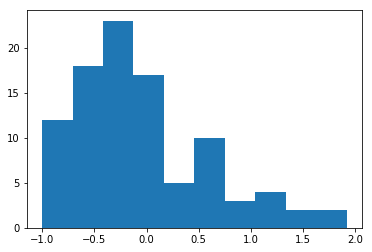

In [445]:
# subset ON comparison, without outliers PtNr s 92 and 123
OnDelOutl = dataOnOnvsOn[dataOnOnvsOn['PtNr'] != (92)]
OnDelOutl = OnDelOutl[OnDelOutl['PtNr'] != (123)]
print(len(OnDelOutl['UPDRS.III_%PrePost_MedON']))
print(np.max(OnDelOutl['UPDRS.III_%PrePost_MedON']))
plt.hist(OnDelOutl['UPDRS.III_%PrePost_MedON'])

(array([12., 18., 23., 17.,  5., 10.,  3.,  4.,  2.,  2.]),
 array([-1.        , -0.70833333, -0.41666667, -0.125     ,  0.16666667,
         0.45833333,  0.75      ,  1.04166667,  1.33333333,  1.625     ,
         1.91666667]),
 <a list of 10 Patch objects>)

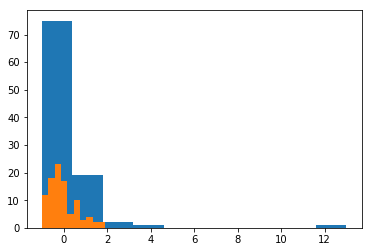

In [444]:
plt.hist(dataOnOnvsOn['UPDRS.III_%PrePost_MedON'])
plt.hist(OnDelOutl['UPDRS.III_%PrePost_MedON'])

0.46153846153846156
-1.0


(array([ 9., 16., 15., 21., 12.,  7.,  4.,  2.,  3.,  2.]),
 array([-1.        , -0.85384615, -0.70769231, -0.56153846, -0.41538462,
        -0.26923077, -0.12307692,  0.02307692,  0.16923077,  0.31538462,
         0.46153846]),
 <a list of 10 Patch objects>)

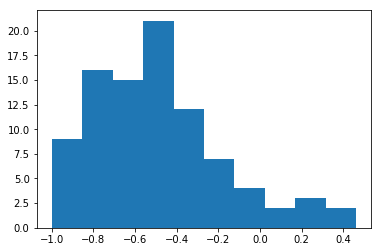

In [408]:
print(np.max(dataOnOnvsOff['UPDRS.III_%PrePost_MedOFF'])) # max = 0.46
print(np.min(dataOnOnvsOff['UPDRS.III_%PrePost_MedOFF'])) # min = -1.0 -> 100% decrease, logical minimal
plt.hist(dataOnOnvsOff['UPDRS.III_%PrePost_MedOFF']) # looks quiet gaussian, skewed too left, negative -> III decrease



[750.0, 625.0, 368.0, 331.0, 267.0, 199.0, 170.0, 144.0, 70.0, 62.5]
(array([67]),)


750.0

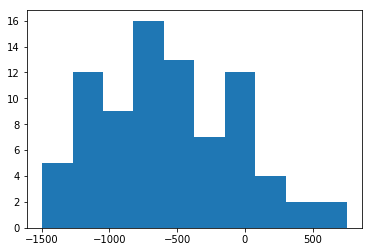

In [488]:
plt.hist(dataOnOnvsOff['LED_PrePostDiff'].dropna())
print((sorted(dataOnOnvsOff['LED_PrePostDiff'].dropna(), reverse=True))[:10])
print(np.where(dataOnOnvsOff['LED_PrePostDiff'] == np.max(dataOnOnvsOff['LED_PrePostDiff']))) # 
np.max(dataOnOnvsOff['LED_PrePostDiff'])

In [506]:
print(dataOnOnvsOff['LED_PrePostDiff'][65:68])
print(dataOnOnvsOff['LED_PrePostDiff'][75:79])




98     267.0
99       0.0
100    750.0
Name: LED_PrePostDiff, dtype: float64
110     170.0
111     625.0
112   -1125.5
113    -105.0
Name: LED_PrePostDiff, dtype: float64


PtNr of highest 10 LED increasements postop in OnOn vs Off population:
99, 101, 113, 114, ...

In [487]:
# find id's/position of patients with large LED increase postoperative in OnOnvsOff population
for pt in (sorted(dataOnOnvsOff['LED_PrePostDiff'].dropna(), reverse=True))[:10]:
    print(np.where(dataOnOnvsOff['LED_PrePostDiff'] == pt)) # 

print(dataOnOnvsOff['LED_PrePostDiff'][67])
print(dataOnOnvsOff['PtNr'][67])
print('Pt nr:',dataOnOnvsOff['PtNr'][67],'improved UPDRS III OnOn vs Off with ',dataOnOnvsOff['UPDRS.III_%PrePost_MedOFF'][67],
      'While LED increased with ',dataOnOnvsOff['LED_PrePostDiff'][67]) 




(array([67]),)
(array([76]),)
(array([4]),)
(array([41]),)
(array([65]),)
(array([56]),)
(array([75]),)
(array([24]),)
(array([17]),)
(array([68]),)
-512.5
68
Pt nr: 68 improved UPDRS III OnOn vs Off with  -0.38461538461538464 While LED increased with  -512.5


In [481]:
print(dataOnOnvsOff['UPDRS.III_%PrePost_MedOFF'][67])

-0.38461538461538464


(array([ 5., 12.,  8., 15., 14., 10., 15.,  5.,  2.,  2.]),
 array([-1497. , -1272.3, -1047.6,  -822.9,  -598.2,  -373.5,  -148.8,
           75.9,   300.6,   525.3,   750. ]),
 <a list of 10 Patch objects>)

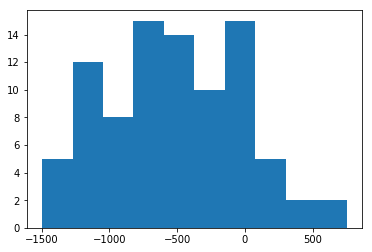

In [311]:
plt.hist(dataOnOnvsOn['LED_PrePostDiff'].dropna())
#np.any(np.isnan((dataOnOnvsOn['LED_PrePostDiff'])))

In [ ]:
### explore machine learning algorithms

In [ ]:
## prepare simple ML test
# exclude variables with NaN and (more important?) with infinity!! (add 1 to 0 results in III or LED..)
MLOfftest = dataOnOnvsOff
MLOfftest[]

In [455]:

# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# Fitting the linear regression to the data
lr.fit(dataOnOnvsOff[['Age_DBS','UPDRS.III_pre_%LEDdif', 'LED_%PrePostDiff']].values,dataOnOnvsOff['UPDRS.III_%PrePost_MedOFF'])
# Looking at model parameters
# Regression weights

print('Weights are %f, %f, %f ' % (lr.coef_[0], lr.coef_[1], lr.coef_[2]))
# Intercept
print('Intercept is %f' % lr.intercept_)

# Predict target variable based on input data (should be unseen data)
prediction = lr.predict(dataOnOnvsOff[['Age_DBS','UPDRS.III_pre_%LEDdif', 'LED_%PrePostDiff']].values)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').